In [113]:
import random

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import datasets
import scipy.cluster.hierarchy as hac

import pandas as pd
import datetime
# import seaborn as sb


In [253]:
color_list = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'purple', 'pink', 'orange']


In [7]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

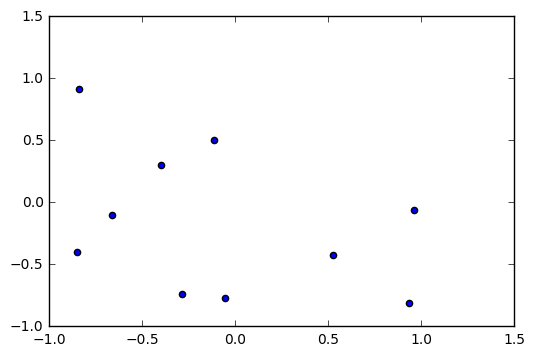

In [8]:
x_norm = init_board(10)
plt.scatter(x_norm[:, 0], x_norm[:, 1])


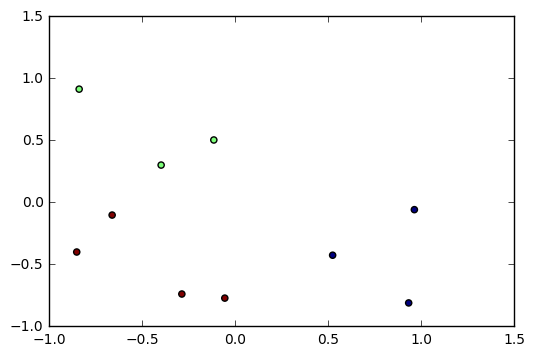

In [9]:
tester_norm=KMeans(n_clusters=3)
tester_norm.fit(x_norm)
labels_norm = tester_norm.labels_
plt.scatter(x_norm[:, 0], x_norm[:, 1], c=labels_norm.astype(np.float))

In [10]:
print tester_norm.labels_

[2 0 1 1 0 2 2 1 0 2]


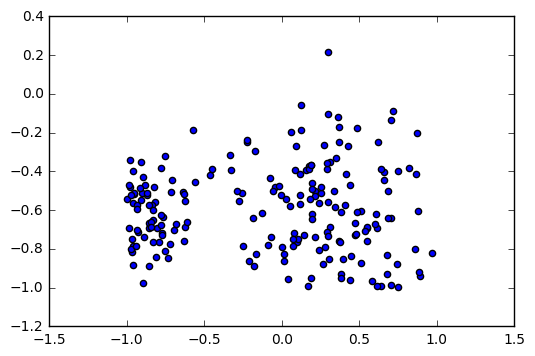

In [11]:
x_gauss = init_board_gauss(N=200, k=3)
plt.scatter(x_gauss[:, 0], x_gauss[:, 1])


{'blue': 78, 'green': 122}

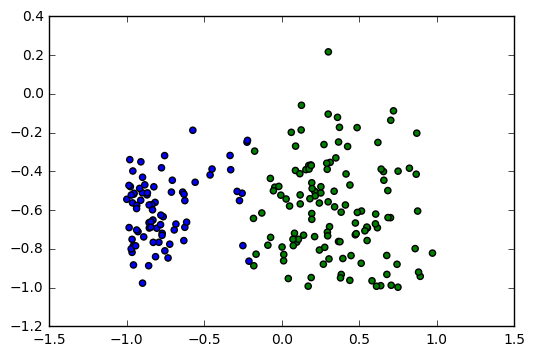

In [236]:
def k_cluster( data, n= 2, dates = None):
    tester=KMeans(n_clusters=n)
    tester.fit(data)
    labels = tester.labels_.tolist()
    
    counts = {color_list[x]: labels.count(x) for x in range(n)}
    
    colors = [color_list[x] for x in labels]
    if dates is not None:
        plt.scatter(dates, data[:, 1], c=colors)

        plt.gcf().autofmt_xdate()
    else:
        plt.scatter(data[:, 0], data[:, 1], c=colors)
    return counts
k_cluster(x_gauss)

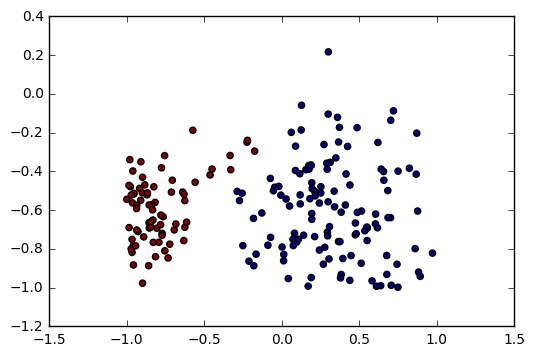

In [60]:
def agg_cluster (data,dates = None,  affinity = "euclidean", linkage = "complete", n = 2):
    # Affinity = {“euclidean”, “l1”, “l2”, “manhattan”,
    # “cosine”}
    # Linkage = {“ward”, “complete”, “average”}
    Hclustering = AgglomerativeClustering(n_clusters=n, affinity=affinity, linkage=linkage)
    Hclustering.fit(data)
    labels = Hclustering.labels_
    if dates is not None:
        plt.scatter(dates, data[:, 1], c=labels.astype(np.float))
        plt.gcf().autofmt_xdate()
    else: 
        plt.scatter(data[:, 0], data[:, 1], c=labels.astype(np.float))
agg_cluster(x_gauss, affinity="manhattan" )

In [90]:
# Kx = tester_gauss.cluster_centers_
# Kx_mapping = {case:cluster for case, cluster in enumerate(tester_gauss.labels_)}
# Hclustering = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete')
# Hclustering.fit(Kx)

# labels_gauss = Hclustering.labels_
# print labels_gauss
# # plt.scatter(x_gauss[:, 0], x_gauss[:, 1], c=labels_gauss.astype(np.float))

In [108]:

import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

def test_clusters(data, dates = None):

    fig, axes23 = plt.subplots(2, 3)

    for method, axes in zip(['single', 'complete'], axes23):
        
        z = hac.linkage(data, method=method)
        
        # Plotting
        axes[0].plot(range(1, len(z)+1), z[::-1, 2])
        knee = np.diff(z[::-1, 2], 2)
        axes[0].plot(range(2, len(z)), knee)

        num_clust1 = knee.argmax() + 2
        knee[knee.argmax()] = 0
        num_clust2 = knee.argmax() + 2

        axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- elbow point')

        part1 = hac.fcluster(z, num_clust1, 'maxclust')
#         print part1
        part2 = hac.fcluster(z, num_clust2, 'maxclust')


        clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
        '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']
        
        for part, ax in zip([part1, part2], axes[1:]):
            if dates is not None:
                ax.scatter(dates, data[:, 1], c = part)
                plt.gcf().autofmt_xdate()
            else:
                ax.scatter(data[:, 0], data[:, 1], c = part)
            
#             for cluster in set(part):
#                   ax.scatter(data[part == cluster, 0], data[part == cluster, 1], 
#                            color=clr[cluster])

        m = '\n(method: {})'.format(method)
        plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
                 ylabel='{}\ncluster distance'.format(m))
        plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
        plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

    plt.tight_layout()
    plt.show()

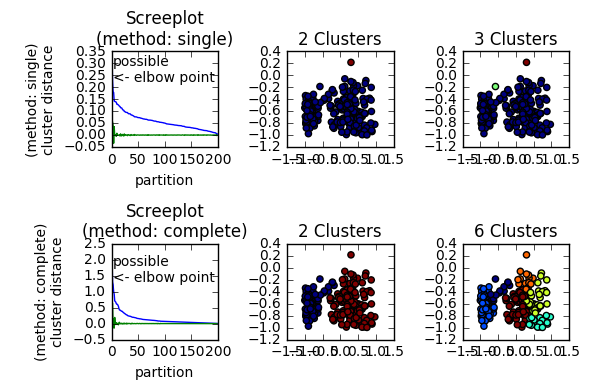

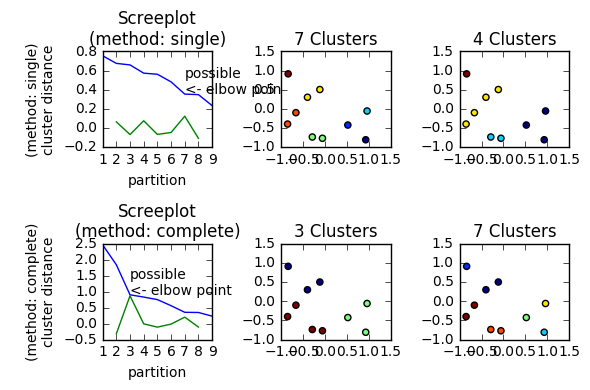

In [89]:
test_clusters(x_gauss)
test_clusters(x_norm)

In [290]:
start_date = datetime.datetime(1920,01,01)
end_date = datetime.datetime.now()
funun=pd.read_csv("test.csv", parse_dates = ["Date", "DOB", "Time"])#.dropna()
#drop na when plotting with datetimes, because it cleans out the unusable rows
mask = (funun['DOB'] > start_date) & (funun['DOB'] <= end_date)
funun = funun.loc[mask]
funun.sample(n=5)

,Unnamed: 0,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,SoldNew,YearRelease,DayOfWeek,Time
394617,394617,Miles,Hunsaker,Logan,1990-04-02,X-box,Lord of the Rings:Fellowship of the Rings,2011-11-07 16:26:43,1990.0,1990.0,9.99,19.99,False,2002,0.0,2017-04-26 16:26:43
12075,12075,Steve,McCullough,Hyrum,1971-12-29,Game Cube,Rayman Arena,2013-12-19 16:37:44,1970.0,1971.0,14.99,26.49,False,2002,2.0,2017-04-26 16:37:44
304139,304139,Paul,Austin,Preston,1983-08-28,Playstation 3,Call of Duty: Modern Warfare 3 *********,2012-09-13 12:51:27,1980.0,1983.0,9.99,19.99,False,2011,6.0,2017-04-26 12:51:27
126499,126499,Norma,Dahle,Logan,1966-03-05,Nintendo 64,Controller-original-gray/grey,2013-01-25 15:14:41,1960.0,1966.0,19.99,29.99,False,Unknown,5.0,2017-04-26 15:14:41
300883,300883,Tylan,Crane,South Weber,1991-11-09,Playstation 3,Grand Theft Auto IV(4): Episodes from Liberty ...,2014-12-12 18:43:25,1990.0,1991.0,9.99,19.99,False,Unknown,5.0,2017-04-26 18:43:25


In [312]:
funun.Platform.unique()
funun[funun["Title"].str.contains("Console")==True]
funun[funun["Title"].str.contains("System")==True]

,Unnamed: 0,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,SoldNew,YearRelease,DayOfWeek,Time
341,341,Ben,Miller,Smithfield,1983-06-19,Game Cube,System-Black,2004-03-26 17:17:59,1980.0,1983.0,49.99,99.99,False,Unknown,6.0,2017-04-26 17:17:59
343,343,Thorman,Bannister,Lewiston,1985-01-06,Game Cube,System-Black,2004-04-01 17:50:24,1980.0,1985.0,49.99,99.99,False,Unknown,6.0,2017-04-26 17:50:24
345,345,Mathew,Bingham,Smithfield,1982-11-01,Game Cube,System-Black,2004-04-03 11:03:06,1980.0,1982.0,49.99,99.99,False,Unknown,0.0,2017-04-26 11:03:06
346,346,Brian,Woodbrey,Petersboro,1985-12-24,Game Cube,System-Black,2004-04-03 15:57:42,1980.0,1985.0,49.99,99.99,False,Unknown,1.0,2017-04-26 15:57:42
347,347,Adam,Porter,Logan,1984-07-20,Game Cube,System-Black,2004-04-15 11:48:04,1980.0,1984.0,49.99,99.99,False,Unknown,4.0,2017-04-26 11:48:04
348,348,Brooks,Parker,Logan,1979-03-30,Game Cube,System-Black,2004-04-16 19:31:19,1970.0,1979.0,49.99,99.99,False,Unknown,4.0,2017-04-26 19:31:19
349,349,Colby,Poulsen,Logan,1985-02-27,Game Cube,System-Black,2004-04-19 18:11:13,1980.0,1985.0,49.99,99.99,False,Unknown,2.0,2017-04-26 18:11:13
351,351,Phil,Albright,Tremonton,2001-10-15,Game Cube,System-Black,2004-04-21 17:01:01,2000.0,2001.0,49.99,99.99,False,Unknown,0.0,2017-04-26 17:01:01
353,353,Lee,Earl,Logan,1980-02-24,Game Cube,System-Black,2004-04-23 16:03:46,1980.0,1980.0,49.99,99.99,False,Unknown,6.0,2017-04-26 16:03:46
354,354,Bradon,Balls,Hyde Park,1984-03-27,Game Cube,System-Black,2004-04-27 21:17:02,1980.0,1984.0,49.99,99.99,False,Unknown,1.0,2017-04-26 21:17:02


In [274]:
# plot price vs age of person buying it
p1 = funun[funun["Platform"] == "Nintendo"]
p2= pd.concat([p1['DOB'].astype(np.int64), p1['used']], axis =1)
lst=np.array([x for x in p2.values])
dates = p1["DOB"].astype(datetime.time).tolist()




In [274]:
#time of sale vs amount spend
# sometimes filter by day of week
# p1 = funun[funun["DayOfWeek"] == 4]
p1 = funun
p2= pd.concat([p1['Time'].astype(np.int64), p1['used']], axis =1)

lst=np.array([x for x in p2.values])
dates = p1["Time"].astype(datetime.time).tolist()




In [325]:
#time of sale vs Age
# sometimes filter by day of week
# p1 = funun[funun["DayOfWeek"] == 4]
p1 = funun
p2= pd.concat([p1['DOB'].astype(np.int64), p1['Time'].astype(np.int64)], axis =1)

lst=np.array([x for x in p2.values])
dates = p1["DOB"].astype(datetime.time).tolist()




In [274]:
#plot used vs new prices
p1 = funun
p2= pd.concat([p1['new'], p1['used']], axis =1)
lst=np.array([x for x in p2.values])
dates = None



In [315]:
# Age vs used price
p1 = funun[funun["YearRelease"] != "Unknown"]
#filter out system's and consoles. game only
p1 = p1[p1["Title"].str.contains("Console")==False]
p1 = p1[p1["Title"].str.contains("System")==False]
p1 = p1[p1["Title"].str.contains("console")==False]
p1 = p1[p1["Title"].str.contains("system")==False]



p2= pd.concat([p1['YearRelease'].astype(np.int64), p1['used']], axis =1)
lst=np.array([x for x in p2.values])
dates = None



In [305]:
print lst

[[ 2002.       9.99]
 [ 2002.       9.99]
 [ 2002.       9.99]
 ..., 
 [ 2014.      17.99]
 [ 2014.      17.99]
 [ 2016.      34.99]]


In [288]:
#can only be run on small datasets
test_clusters(lst,dates= dates)


In [289]:
#can only be run on small datasets
agg_cluster(data=lst, n=4, dates=dates)

{'blue': 82248, 'yellow': 5936, 'green': 12305, 'cyan': 59247, 'magenta': 102559, 'red': 64899}


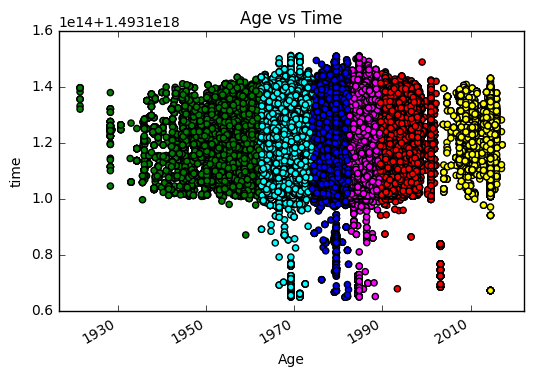

In [326]:
print k_cluster(lst, n = 6, dates=dates)
plt.title("Age vs Time")
plt.xlabel("Age")
plt.ylabel("time")        
ax = plt.gca()
#set limit for dates, when plotting day of week
# ax.set_xlim(datetime.datetime(2017,4,26,0,0,0), datetime.datetime(2017, 4, 26, 23,59,59))
# ax.set_ylim(-5, 280)
# ax.set_xlim(1980, 2020)
